$u_t - u_{xx}= 0$

In [49]:
#Imports
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import tensorflow as tf
import sciann as sn 
from sciann_datagenerator import * 

from matplotlib import animation

We are going to solve the logistic equation.If $f$ is the solution of the logistic equation with initial value $x_0$, our function will take two inputs, x_0 and x, and give the value of $f$.

In [102]:
#We are solving the heat equation in a segment
#We start with a Dirichlet boundary condition on the left.


#armo un intervalo en R, [-1,1]. No Va a tener boundary condition. La condicion inicial va a ser  una gaussiana.

#The following command generates datapoints for the domain and the boundary condition.

dg = DataGeneratorXY([-2., 2.],[0., 4.], ["domain",'bc-bot','bc-left', 'bc-right'], 4000) #, "bc-right"]
input_data, target_data = dg.get_data()

#input_data : los valores de x donde voy a evaluar la u
#target_data: Los valores de u(x) para cada x en input_data. Como recien lo inicializo, es vector de ceros.
#Se rellena cuando entrenemos la red.



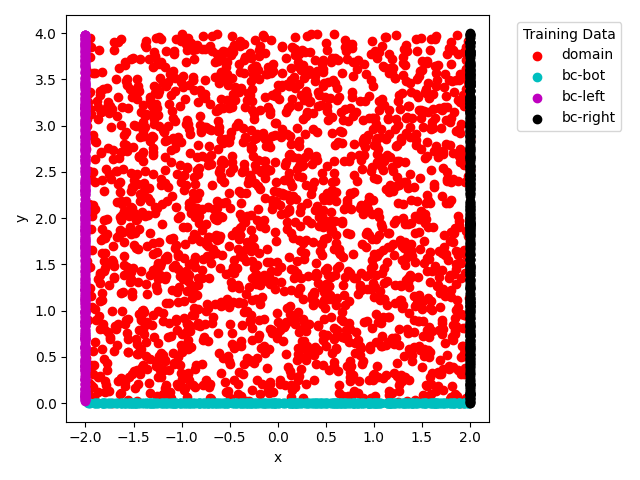

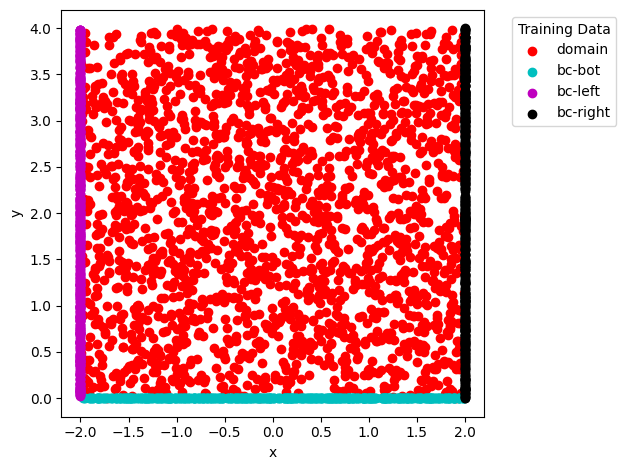

In [103]:
dg.plot_data()
#ploteo mis puntos _collocation points_ que tienen muchos puntos en el borde, al pedo, y  puntos en el intervalo [0,4]
#El scatter es solo para que se vea mejor, son todos puntos de R.

In [58]:
#defino mis funcion y mis variables

#function variable
x = sn.Variable('x')

#initial condition. I treat it as a variable for the NN u.
t = sn.Variable('t')

u = sn.Functional('u', [x,t], hidden_layers = 4*[30], activation = 'tanh', res_net=True) #esta es la red neuronal cruda sin entrenar,


In [116]:
#ahora defino la loss function para u

#Pido que satisfaga la ecuacion del calor ut - uxx = 0
L = sn.diff(u, t, order = 1) - sn.diff(u, x, order=2)  

#Dato inicial u(0) = e - x^2

C1 = (t==0) *( sn.sub(u,sn.exp(- sn.pow(x,2))))
C2 = (x==-2) * u
C3 = (x==2) * u


In [117]:
modelo = sn.SciModel([x,t], [L,C1, C2, C3], optimizer = 'adam')


In [118]:
history = modelo.train(x_true = input_data, 
             y_true = target_data, 
             epochs = 100,
             learning_rate = 0.001,
             adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True})


Total samples: 5000 
Batch size: 64 
Total batches: 79 


+ NTK evaluation time [s]: 6.610007047653198 

+ adaptive_weights at epoch 1: [0.2753209535208872, 1.8716411731422595, 0.8384454968320276, 1.014592376504825]
Epoch 1/100
79/79 [==============================] - 14s 78ms/step - batch: 39.0000 - size: 63.2911 - loss: 0.0080 - sub_17_loss: 0.0103 - mul_248_loss: 4.8425e-04 - mul_249_loss: 0.0013 - mul_250_loss: 0.0031 - lr: 0.0010 - time: 24.1875 - loss_weight_0: 0.2753 - loss_weight_1: 1.8716 - loss_weight_2: 0.8384 - loss_weight_3: 1.0146 - loss_gradient_0: 453.0277 - loss_gradient_1: 80.4561 - loss_gradient_2: 217.1421 - loss_gradient_3: 132.7841
Epoch 2/100
79/79 [==============================] - 2s 29ms/step - batch: 39.0000 - size: 63.2911 - loss: 0.0012 - sub_17_loss: 0.0029 - mul_248_loss: 1.2368e-04 - mul_249_loss: 9.0340e-05 - mul_250_loss: 8.6950e-05 - lr: 0.0010 - time: 2.3221 - loss_weight_0: 0.2753 - loss_weight_1: 1.8716 - loss_weight_2: 0.8384 - loss_weight_3: 1.0

In [119]:
#valores = np.arange(0,4,0.001)

valores = np.meshgrid(np.linspace(-2,2,100),np.linspace(0,4,200))
valores_y = u.eval(valores)

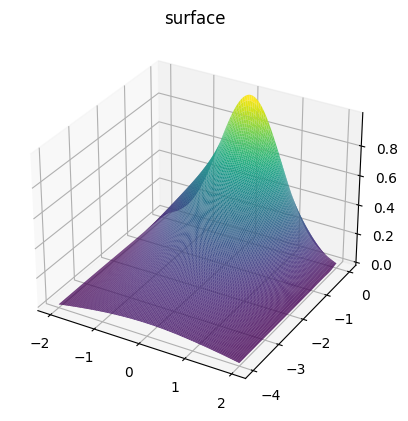

In [120]:
%matplotlib widget

ax = plt.axes(projection='3d')
ax.plot_surface(valores[0], -1*valores[1], valores_y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');



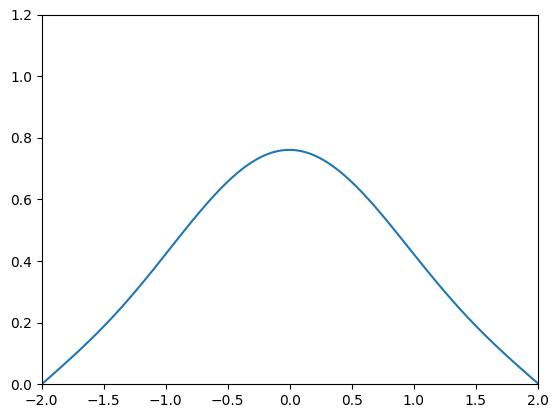

In [123]:
#Vamos a tratar de hacer la animacion
k=9
plt.xlim(-2,2)
plt.ylim(0,1.2)
plt.plot(valores[0][k],valores_y[k])

MovieWriter ffmpeg unavailable; using Pillow instead.


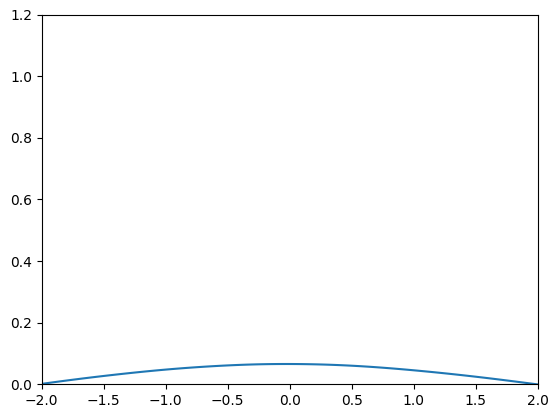

In [122]:
from matplotlib import animation

#countries_plot = ['Spain', 'Italy', 'United States']
#linechart_plot = gapminder.loc[gapminder['country'].isin(countries_plot), :]

# Define colors
#colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()

ax.set_xlim(-2,2)
ax.set_ylim(0,1.2)

def update_linechart(k):
  #for j in range(len(colors)):
   # country = countries_plot[j]
    #color = colors[j]

    #data = linechart_plot.loc[linechart_plot['country'] == country,:]
  ax.clear()
  ax.set_xlim(-2,2)
  ax.set_ylim(0,1.2)
  values_x = valores[0][k]
  values_y = valores_y[k]
  ax.plot(values_x, values_y)
  

num_frames = 200 #its hardcoced, should automate it     
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
anim.save('linechart.gif')

## Heat equation in $\mathbb{R}^2$

We will now do the same thing but in a square in space.

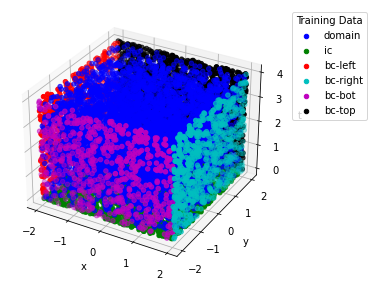

In [2]:
#Generating the data

number_of_points = 10000

dg = DataGeneratorXYT([-2.,2.], [-2.,2.],[0.,4.], num_sample=number_of_points, 
                     targets=['domain', 'ic', 'bc-left', 'bc-right', 'bc-bot', 'bc-top'])
input_data, target_data = dg.get_data()

dg.plot_data()

In [3]:
#Now we define our model

#defino mis funcion y mis variables

#spatial variables
x = sn.Variable('x')
y = sn.Variable('y')

#time variable
t = sn.Variable('t')

u = sn.Functional('u', [x,y,t], hidden_layers = 4*[30], activation = 'tanh', res_net=True) #esta es la red neuronal cruda sin entrenar,


In [4]:
#We define the loss function

#The first term is the equation part
L = sn.diff(u, t, order = 1) - sn.diff(u, x, order=2)  - sn.diff(u,y,order=2)

#Dato inicial u(0) = e - x^2 - y^2

C1 = (t==0) *( sn.sub(u,sn.exp(-sn.add( sn.pow(x,2), sn.pow(y,2)))))
C2 = (x==-2) * u
C3 = (x==2) * u
C4 = (y==-2) * u
C5 = (y==2) * u

#IC = (t==0.) * (sn.abs( sn.sub(u, np.e^(-x^2)) ))

In [5]:
modelo = sn.SciModel([x,y,t], [L,C1, C2, C3,C4,C5], optimizer = 'adam')

In [6]:
history = modelo.train(x_true = input_data, 
             y_true = target_data, 
             epochs = 100,
             learning_rate = 0.001,
             adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True})


Total samples: 11250 
Batch size: 64 
Total batches: 176 


+ NTK evaluation time [s]: 4.650735139846802 

+ adaptive_weights at epoch 1: [0.11256051756198607, 0.9048358960017825, 0.7527058791471274, 1.2395908685156165, 2.3510331661625457, 0.6392736726109423]
Epoch 1/100
176/176 [==============================] - 18s 10ms/step - batch: 87.5000 - size: 63.9205 - loss: 0.4608 - sub_2_loss: 0.7120 - mul_2_loss: 0.1751 - mul_3_loss: 0.0379 - mul_4_loss: 0.0553 - mul_5_loss: 0.0377 - mul_6_loss: 0.0571 - lr: 0.0010 - time: 25.3981 - loss_weight_0: 0.1126 - loss_weight_1: 0.9048 - loss_weight_2: 0.7527 - loss_weight_3: 1.2396 - loss_weight_4: 2.3510 - loss_weight_5: 0.6393 - loss_gradient_0: 9717.9437 - loss_gradient_1: 189.0765 - loss_gradient_2: 332.7415 - loss_gradient_3: 195.1883 - loss_gradient_4: 158.2328 - loss_gradient_5: 385.7558
Epoch 2/100
176/176 [==============================] - 2s 12ms/step - batch: 87.5000 - size: 63.9205 - loss: 0.0675 - sub_2_loss: 0.1565 - mul_2_loss: 0.0

In [7]:
valores = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100), np.linspace(0,4,200))
valores_z = u.eval(valores)

In [28]:
#Trato de graficar el dato inicial
#print(valores[3][0][0])

def data_to_plot(t):
    xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
    

    n, m = len(xx), len(yy)
    zz= [[0 for j in range(m)] for i in range(n)]

    for i in range(n):
        for j in range(m):
            zz[i][j] = valores_z[i][j][t]
    
    return zz

zz = data_to_plot(0)
#plt.plot(valores[0][0], valores[1][0], valores_z[0][0])
#plt.show()

In [34]:
zz = np.array(zz)

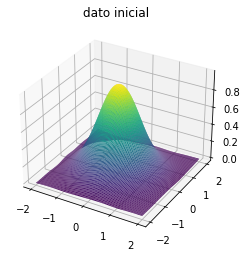

In [35]:
xx, yy = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('dato inicial');

In [40]:
print(xx[0])

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

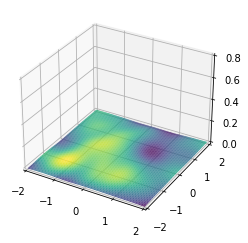

In [55]:
from matplotlib import animation

#countries_plot = ['Spain', 'Italy', 'United States']
#linechart_plot = gapminder.loc[gapminder['country'].isin(countries_plot), :]

# Define colors
#colors = ['red', 'green', 'blue']

#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax = plt.axes(projection='3d')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(0,0.8)

def update_linechart(k):
  #for j in range(len(colors)):
   # country = countries_plot[j]
    #color = colors[j]

    #data = linechart_plot.loc[linechart_plot['country'] == country,:]
  ax.clear()
  ax.set_xlim3d(-2,2)
  ax.set_ylim3d(-2,2)
  ax.set_zlim3d(0,0.8)
  values_x = xx
  values_y = yy
  values_z = np.array(data_to_plot(k))
  ax.plot_surface(values_x, values_y, values_z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
  


num_frames = 200 #its hardcoced, should automate it     
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
anim.save('heatEquation3d_v.gif')


# Future work

$u_t = Lap (u) + u(1-u/k)$

u(x,t) = proporcion de gente en x a tiempo t

Mirar la ecuacion del zealoutry. 
-armar la red que lo resuelva (en papel) (en (x,t)) (con o sin o ruido)
-empezamos con agentes en $\mathbb{R}$ ?

lo de salome, pensar
